In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "2019-Oct.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mkechinov/ecommerce-behavior-data-from-multi-category-store",
    file_path,
)

print(df.head())

/var/folders/51/y_cvjdks0xb6lr7m4lfpg2dm0000gn/T/ipykernel_6691/1316896879.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fc

In [2]:
import pandas as pd

df = pd.read_csv("2019-Oct.csv")
print(df.head())

                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_id  \
0                                  NaN  shiseido    35.79  541312140   
1  appliances.environment.water_heater      aqua    33.20  554748717   
2           furniture.living_room.sofa       NaN   543.10  519107250   
3                   computers.notebook    lenovo   251.74  550050854   
4               electronics.smartphone     apple  1081.98  535871217   

                           user_session  
0  72d76fde-8bb3-4e00-8c23-a032dfed738c  
1  9333dfbd-b87a-4708-9857-6336556b0fc

In [3]:
df["is_purchase"] = (df["event_type"] == "purchase").astype(int)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,is_purchase
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,0
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,0
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,0
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,0
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,0
...,...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193,0
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8,0
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd,0
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204,0


In [8]:

df["event_time"] = pd.to_datetime(df["event_time"])

df["hour_of_day"] = df["event_time"].dt.hour
df["day_of_week"] = df["event_time"].dt.dayofweek
df["price_bin"] = pd.qcut(df["price"], q=4, labels=False).astype(int)

df["category_code_encoded"] = df["category_code"].astype("category").cat.codes
df["brand_encoded"] = df["brand"].astype("category").cat.codes

category_counts = df["category_code"].value_counts()
df["category_popularity"] = df["category_code"].map(category_counts)

session_counts = df["user_session"].value_counts()
df["session_event_count"] = df["user_session"].map(session_counts)


In [9]:
features = [
    "category_code_encoded",
    "brand_encoded",
    "price",
    "hour_of_day",
    "day_of_week",
    "price_bin",
    "category_popularity",
    "session_event_count"
]

print(df[features].isnull().sum())

X = df[features]
y = df["is_purchase"]
df = df.dropna(subset=features)

category_code_encoded           0
brand_encoded                   0
price                           0
hour_of_day                     0
day_of_week                     0
price_bin                       0
category_popularity      13515609
session_event_count             2
dtype: int64


In [13]:
df.loc[:, "category_popularity"] = df["category_popularity"].fillna(0)

In [16]:
df_sampled = df.sample(frac=0.1, random_state=42)

X = df_sampled[features]
y = df_sampled["is_purchase"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


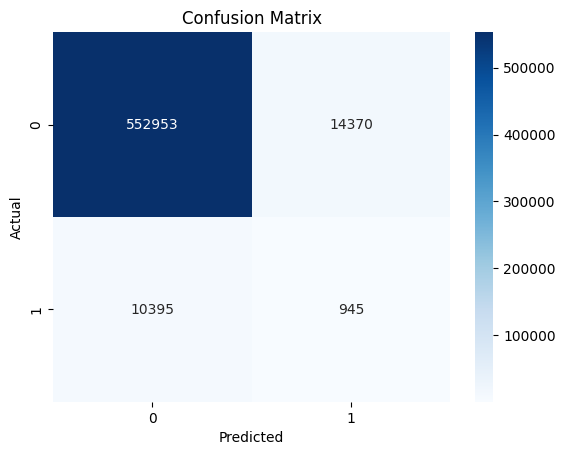

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.2).astype(int)

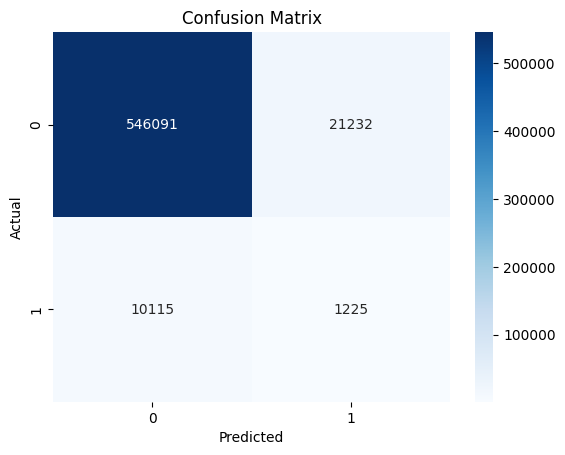

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    567323
           1       0.05      0.11      0.07     11340

    accuracy                           0.95    578663
   macro avg       0.52      0.54      0.52    578663
weighted avg       0.96      0.95      0.95    578663



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
for n in [100, 200, 300, 500]:
    model = RandomForestClassifier(n_estimators=n, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nAccuracy for {n} trees:")
    print(classification_report(y_test, y_pred))
    

In [25]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=50,  
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/chriszhang/repos/ecommerce_trends_ml/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <8E129FE8-EF1C-38EA-A9CF-202782564052> /Users/chriszhang/repos/ecommerce_trends_ml/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]
